Starting Portfolio Value: 100000.00
BUY 112500 shares at 0.8
2000-07-07, BUY EXECUTED, 0.81
SELL 112500 shares at 0.37
2001-06-27, SELL EXECUTED, 0.37
BUY 167890 shares at 0.27
2001-09-07, BUY EXECUTED, 0.27
SELL 167890 shares at 0.37
2002-01-07, SELL EXECUTED, 0.37
BUY 223496 shares at 0.27
2002-07-10, BUY EXECUTED, 0.27
SELL 223496 shares at 0.29
2003-05-19, SELL EXECUTED, 0.29
BUY 35896 shares at 1.79
2006-06-22, BUY EXECUTED, 1.80
SELL 35896 shares at 2.34
2006-09-26, SELL EXECUTED, 2.35
BUY 21954 shares at 3.73
2008-03-07, BUY EXECUTED, 3.72
SELL 21954 shares at 5.79
2008-05-19, SELL EXECUTED, 5.80
BUY 31406 shares at 3.91
2008-09-24, BUY EXECUTED, 3.93
SELL 31406 shares at 3.69
2009-05-14, SELL EXECUTED, 3.70
BUY 7035 shares at 16.5
2012-12-11, BUY EXECUTED, 16.81
SELL 7035 shares at 15.7
2013-09-11, SELL EXECUTED, 14.82
Final Portfolio Value: 114757.54


<IPython.core.display.Javascript object>


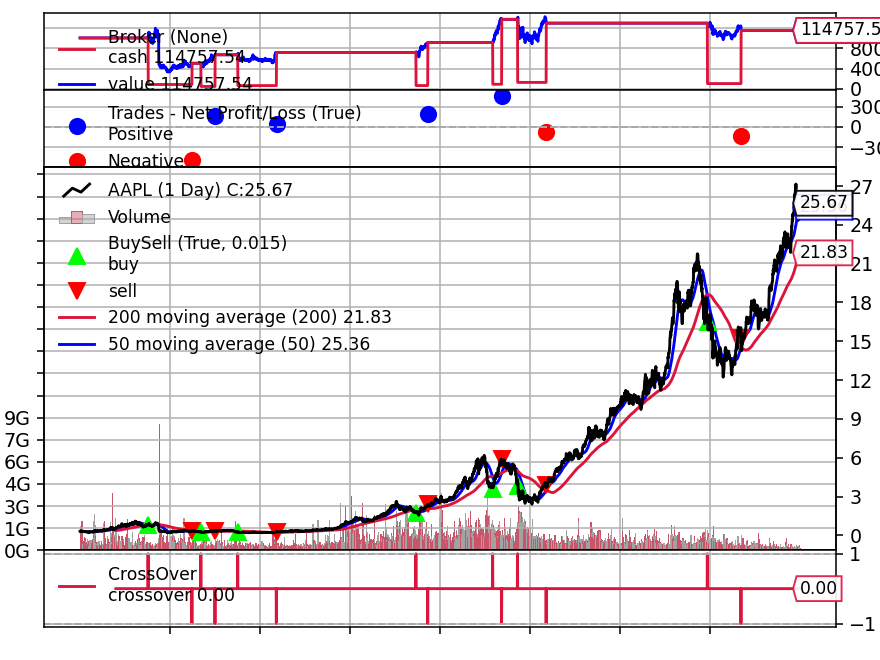

In [2]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import math 

# Import the backtrader platform
import backtrader as bt

class GoldenCross(bt.Strategy) :
    
    params = (('fast',200),('slow',50))
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
    
    def __init__ (self) :
        self.sma1 = bt.indicators.SMA(self.data.close, period = self.params.fast, plotname = '200 moving average') 
        self.sma2 = bt.indicators.SMA(self.data.close, period = self.params.slow, plotname = '50 moving average') 
        
        self.crossover = bt.ind.CrossOver(self.sma1, self.sma2) 
        # If sma2 is going above sma1, crossover is 1 and when sma1 is going above sm2, crossover is -1
        # We want to buy when crossover is 1 and sell when crossover is -1
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None
    
    def next(self) :
        if self.position.size == 0 :   
            if self.crossover > 0 :
                self.numShares = math.floor(self.broker.cash * 0.90/self.data.close)
                
                print("BUY {} shares at {}".format(self.numShares,self.data.close[0]))
                self.buy(size = self.numShares)
        
        if self.position.size > 0 :
            if self.crossover < 0 :
                
                print("SELL {} shares at {}".format(self.numShares,self.data.close[0]))
                self.close()
                

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(GoldenCross)
    name = ['orcl-1995-2014.txt','nvda-1999-2014.txt','yhoo-1996-2014.txt','AAPL.txt']
#     print("djedf")

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname= name[3],
        # Do not pass values before this date
        fromdate=datetime.datetime(1999, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2014, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.001)
    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.plot()

oracle
208882.39 -> 95%
361983.95 -> 98%

nvidia
109580.93 -> 95%
106301.21 -> 98%
114564.79 -> 90%

AAPL
112585.67 -> 95%
114757.54 -> 90%

In [1]:
10 + 9

19